In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [4]:
# Abrindo os datasets
df_train = pd.read_csv('/content/drive/MyDrive/Eng-Comp/Módulo VI /mnist (1)/mnist_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Eng-Comp/Módulo VI /mnist (1)/mnist_test.csv')

In [5]:
# Convertendo para float32
train_data = np.array(df_train, dtype='float32')
test_data = np.array(df_test, dtype='float32')

In [6]:
# Re escalando os inputs de 0 a 1 ao invés de 0 a 255 que é o padrão

x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [7]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

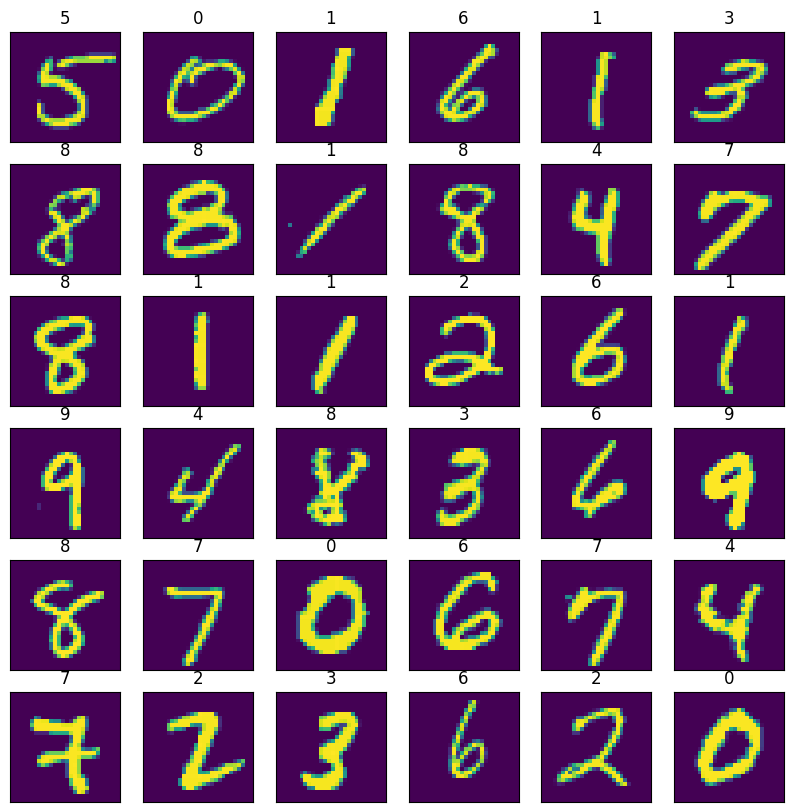

In [8]:
# Verificando o dataset

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

### Criando a CNN

In [9]:
# Definindo o tamanho da imagem para ser input
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [10]:
# Formatando os datasets para facilitar o treinamento
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [11]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),  # downsampling the output
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  # flatten out the layers
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
# Compile the CNN model
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [14]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=35,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/35
12/12 [==============================] - 39s 3s/step - loss: 1.0066 - accuracy: 0.6590 - val_loss: 0.3796 - val_accuracy: 0.8895
Epoch 2/35
12/12 [==============================] - 29s 2s/step - loss: 0.2753 - accuracy: 0.9182 - val_loss: 0.1845 - val_accuracy: 0.9472
Epoch 3/35
12/12 [==============================] - 26s 2s/step - loss: 0.1554 - accuracy: 0.9534 - val_loss: 0.1204 - val_accuracy: 0.9657
Epoch 4/35
12/12 [==============================] - 28s 2s/step - loss: 0.1053 - accuracy: 0.9685 - val_loss: 0.0948 - val_accuracy: 0.9717
Epoch 5/35
12/12 [==============================] - 36s 3s/step - loss: 0.0829 - accuracy: 0.9762 - val_loss: 0.0800 - val_accuracy: 0.9772
Epoch 6/35
12/12 [==============================] - 30s 2s/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0679 - val_accuracy: 0.9802
Epoch 7/35
12/12 [==============================] - 29s 2s/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0615 - val_accuracy: 0.9812
Epoch 8/35
12/12 [==

In [17]:
def preprocess_image(img_path):
    # Load the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img)  # Convert to numpy array
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(1, 28, 28, 1)  # Reshape to match model's input shape (batch_size, height, width, channels)
    return img

In [18]:
img_test = '/content/drive/MyDrive/Eng-Comp/Módulo VI /3.jpg'

In [19]:
processed_image = preprocess_image(img_test)


In [20]:
# Make a prediction
predictions = cnn_model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class name
predicted_class_name = class_names[predicted_class]

print(f'Predicted class: {predicted_class} ({predicted_class_name})')

1/1 [==============================] - 0s 199ms/step
Predicted class: 3 (3)


In [21]:
cnn_model.save("mnist_cnn.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
